# Imports and Load Data

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = '/content/cohorta_trial1_data.csv'
data = pd.read_csv(file_path)

# Replace NaN values with 0
data = data.fillna(0)

# Display the first few rows of the dataset
data.head()

,subject_id,hadm_id,stay_id,dod,mortality_year,aniongap_max,albumin_min,albumin_max,rsp_pao2fio2_vent_min,rsp_pao2fio2_novent_min,...,ARD,HES,COD,MOD,CRF,LCF,flag_high_aniongap,flag_low_albumin,flag_high_albumin,flag_high_bilirubin
0,13730554,28211964,35400714,0,0,12.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,19643038,29928288,32947476,0,0,20.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,18126966,28314801,37538158,25/04/2111,1,15.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,18507022,25623992,39771363,15/05/2118,1,10.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,15511499,25185580,36407234,18/12/2181,1,24.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# Creates model to do logistic regression
def evaluate_concept(concept_name, label_name, data):
    X = data[[concept_name]]
    y = data[label_name]

    model = LogisticRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)

    return {
        'Concept': concept_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }


In [4]:
# Function to evaluate all concepts together
def evaluate_all_concepts(concepts, label_name, data):
    X = data[concepts]
    y = data[label_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Get the weights of each concept
    concept_weights = model.coef_[0]
    weights_dict = {concept: weight for concept, weight in zip(concepts, concept_weights)}

    result = {
        'Concept': 'All Concepts',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Weights': weights_dict
    }

    return result

In [5]:
# Function to evaluate all features together
def evaluate_all_features(features, label_name, data):
    X = data[features]
    y = data[label_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Get the weights of each feature
    feature_weights = model.coef_[0]
    weights_dict = {feature: weight for feature, weight in zip(features, feature_weights)}

    result = {
        'Feature': 'All Features',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Weights': weights_dict
    }

    return result

# #1 Evaluating Concepts Individually

In [6]:
concepts = [
    'rsp_fail_moderate', 'rsp_fail_severe', 'cgn_fail_moderate', 'cgn_fail_severe', 'lvr_fail_moderate',
    'lvr_fail_severe', 'cdv_fail_moderate', 'cdv_fail_severe', 'gcs_fail_moderate', 'gcs_fail_severe',
    'rfl_fail_moderate', 'rfl_fail_severe', 'SSH', 'ARD', 'HES', 'COD', 'MOD', 'CRF', 'LCF',
    'flag_high_aniongap', 'flag_low_albumin', 'flag_high_albumin', 'flag_high_bilirubin'
]

results = []
for concept in concepts:
    result = evaluate_concept(concept, 'mortality_year', data)
    results.append(result)

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

                Concept  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     rsp_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.500864
1       rsp_fail_severe  0.792151   0.572046  0.093018  0.160016  0.537101
2     cgn_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.515321
3       cgn_fail_severe  0.789707   0.688889  0.021790  0.042244  0.509565
4     lvr_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.549329
5       lvr_fail_severe  0.792001   0.797546  0.030459  0.058677  0.514184
6     cdv_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.545508
7       cdv_fail_severe  0.814093   0.723881  0.204545  0.318962  0.591725
8     gcs_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.529071
9       gcs_fail_severe  0.787164   0.000000  0.000000  0.000000  0.512628
10    rfl_fail_moderate  0.787164   0.000000  0.000000  0.000000  0.588867
11      rfl_fail_severe  0.802773   0.652683  0.156748  0.252787  0.567097
12                  SSH  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# #2 Evaluating Concepts Together (C->Y)

Main Results:
        Concept  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  All Concepts  0.832211   0.724359  0.277983  0.401778  0.741356

Weights:
   rsp_fail_moderate  rsp_fail_severe  cgn_fail_moderate  cgn_fail_severe  \
0          -0.117752         0.346631          -0.174917         1.348202   

   lvr_fail_moderate  lvr_fail_severe  cdv_fail_moderate  cdv_fail_severe  \
0          -0.204588         0.839618           0.263157         1.717281   

   gcs_fail_moderate  gcs_fail_severe  rfl_fail_moderate  rfl_fail_severe  \
0           0.365298         0.687049           0.789228         1.673518   

        SSH       ARD       HES       COD       MOD       CRF       LCF  \
0  0.206467 -0.375389  0.614262  0.159871  0.194244  1.674174  0.158728   

   flag_high_aniongap  flag_low_albumin  flag_high_albumin  \
0            0.310263          0.732424          -0.752551   

   flag_high_bilirubin  
0             0.492856  


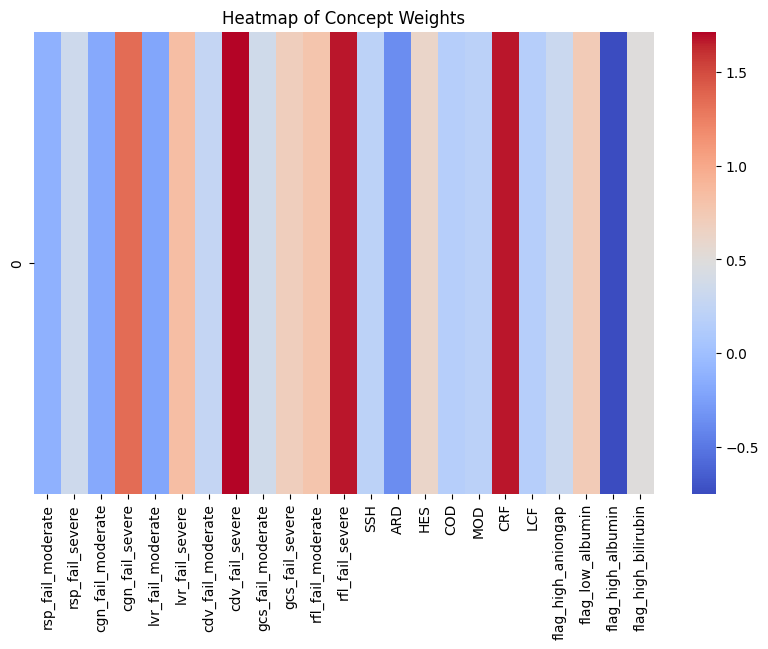

In [7]:
combined_mortality_concepts_results = []

# Evaluate all mortality concepts together
result_all_mortality = evaluate_all_concepts(concepts, 'mortality_year', data)
combined_mortality_concepts_results.append(result_all_mortality)

results_df = pd.DataFrame(combined_mortality_concepts_results )

# Extract the weights
weights_df = pd.DataFrame([result_all_mortality['Weights']])

pd.set_option('display.max_columns', None)

# Display the main results
print("Main Results:")
print(results_df.drop(columns='Weights'))

# Display the weights
print("\nWeights:")
print(weights_df)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weights_df, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Concept Weights')
plt.show()

# #3 Evaluating Features Together (X->Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Main Results:
        Feature  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  All Features  0.827474   0.748971  0.223862  0.344697  0.733245

Weights:
   aniongap_max  albumin_max  albumin_min  rsp_pao2fio2_vent_min  \
0      0.071697     0.011773     0.006527               -0.00121   

   rsp_pao2fio2_novent_min  cgn_platelet_min  lvr_bilirubin_max  cdv_mbp_min  \
0                 0.000086           0.00119           0.167179    -0.024849   

   cdv_rate_dopamine  cdv_rate_dobutamine  cdv_rate_epinephrine  \
0           0.138344             0.048916              0.008188   

   cdv_rate_norepinephrine   gcs_min  rfl_urineoutput  rfl_creatinine_max  
0                 0.036672 -0.064847        -0.000357            0.094043  


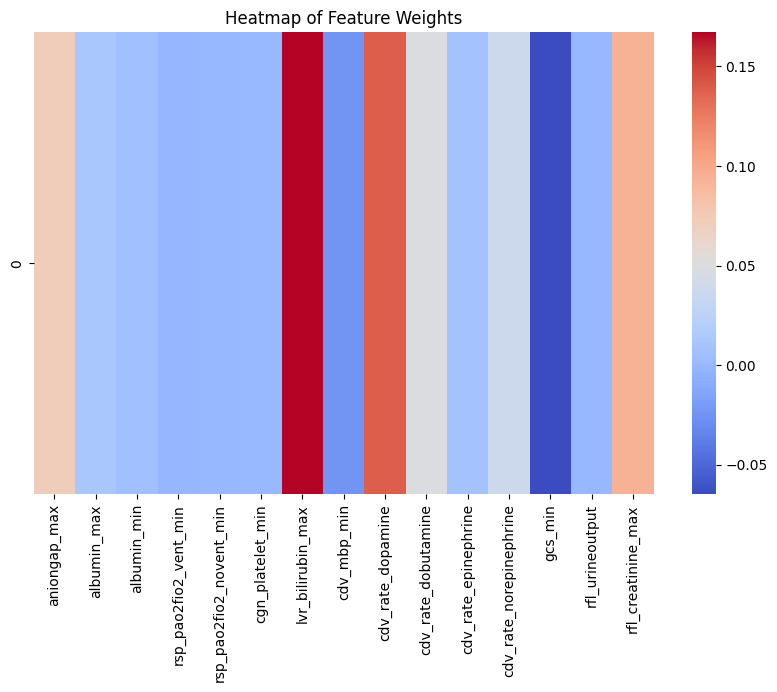

In [8]:
features = ['aniongap_max', 'albumin_max', 'albumin_min', 'rsp_pao2fio2_vent_min', 'rsp_pao2fio2_novent_min',
                          'cgn_platelet_min', 'lvr_bilirubin_max', 'cdv_mbp_min', 'cdv_rate_dopamine', 'cdv_rate_dobutamine',
                          'cdv_rate_epinephrine', 'cdv_rate_norepinephrine', 'gcs_min', 'rfl_urineoutput', 'rfl_creatinine_max']

combined_mortality_features_results = []

# Evaluate all mortality features together
result_all_mortality = evaluate_all_features(features, 'mortality_year', data)
combined_mortality_features_results.append(result_all_mortality)

results_df = pd.DataFrame(combined_mortality_features_results)

# Extract the weights
weights_df = pd.DataFrame([result_all_mortality['Weights']])

pd.set_option('display.max_columns', None)

# Display the main results
print("Main Results:")
print(results_df.drop(columns='Weights'))

# Display the weights
print("\nWeights:")
print(weights_df)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weights_df, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Weights')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


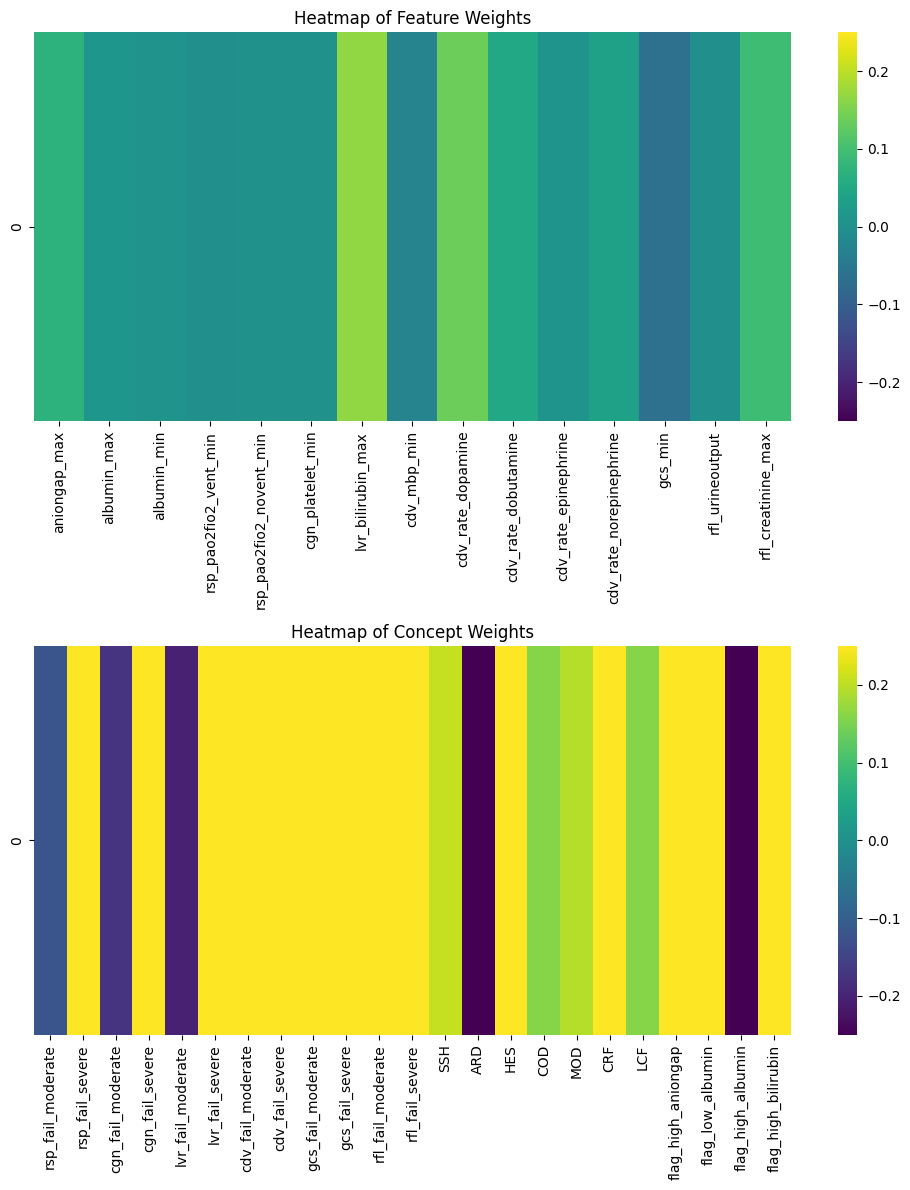

In [12]:
# Define the fixed scale for the heatmaps
fixed_vmin = -0.25  # Set your desired minimum value
fixed_vmax = 0.25   # Set your desired maximum value

# Evaluate all features together
result_all_mortality_features = evaluate_all_features(features, 'mortality_year', data)
weights_features_df = pd.DataFrame([result_all_mortality_features['Weights']])

# Evaluate all concepts together
result_all_mortality_concepts = evaluate_all_concepts(concepts, 'mortality_year', data)
weights_concepts_df = pd.DataFrame([result_all_mortality_concepts['Weights']])

# Create a figure with two subplots arranged in a column
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Plotting the heatmap for feature weights
sns.heatmap(weights_features_df, cmap='viridis', cbar=True, vmin=fixed_vmin, vmax=fixed_vmax, ax=axes[0])
axes[0].set_title('Heatmap of Feature Weights')

# Plotting the heatmap for concept weights
sns.heatmap(weights_concepts_df, cmap='viridis', cbar=True, vmin=fixed_vmin, vmax=fixed_vmax, ax=axes[1])
axes[1].set_title('Heatmap of Concept Weights')

# Adjust layout
plt.tight_layout()

# Save the figure as a single image
plt.savefig('combined_heatmaps.png')

# Show the figure
plt.show()